## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### Re-code the house price machine learning

#### Random Choose Method to get optimal *k* and *b*

In [1]:
from sklearn.datasets import load_boston
import random

In [2]:
data = load_boston()

In [3]:
X, y = data['data'], data['target']

In [5]:
# print(X[:, 5])

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

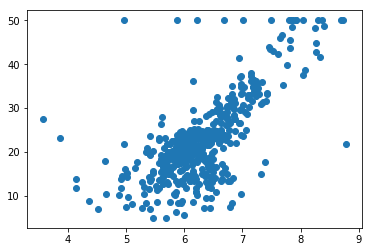

In [8]:
draw_rm_and_price()

In [9]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [10]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [11]:
X_rm = X[:, 5]

In [12]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 70.08795999513285 best_b: 11.459251745285286, and the loss is: 186263.5627988934
When time is : 3, get best_k: 30.828842116625367 best_b: 75.43021271781294, and the loss is: 61110.13491876307
When time is : 4, get best_k: -39.13811742213957 best_b: 73.16438100732, and the loss is: 39346.77659234759
When time is : 6, get best_k: -1.7995796809306057 best_b: -63.88449834353749, and the loss is: 9652.723318162549
When time is : 8, get best_k: 7.1318931698517645 best_b: -34.062995522803675, and the loss is: 184.15099836696882
When time is : 21, get best_k: -0.15655320034564113 best_b: 16.212753506534767, and the loss is: 139.18320690006638
When time is : 58, get best_k: -1.1124357076041491 best_b: 29.918564814352123, and the loss is: 95.16249030328542
When time is : 166, get best_k: 10.190462690684399 best_b: -46.62123450127498, and the loss is: 70.3034982061457
When time is : 620, get best_k: 9.395613484763032 best_b: -40.78989947060769, and the loss is: 61.91

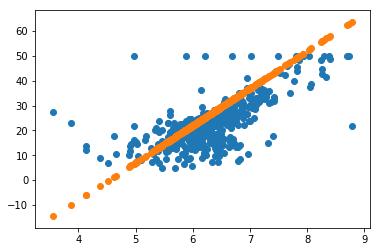

In [13]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

#### Supervised Direction to get optimal *k* and *b*

In [28]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1  # 学习率

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar # 更新 k 和 b
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b # 选择更好的 k 和 b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: 50.02075282477214 best_b: -87.98860020319657, and the loss is: 42419.58356186927
When time is : 2, get best_k: 49.92075282477214 best_b: -87.88860020319657, and the loss is: 42200.39092501179
When time is : 3, get best_k: 49.820752824772136 best_b: -87.78860020319658, and the loss is: 41981.76668927076
When time is : 4, get best_k: 49.720752824772134 best_b: -87.68860020319659, and the loss is: 41763.710854646255
When time is : 5, get best_k: 49.62075282477213 best_b: -87.58860020319659, and the loss is: 41546.22342113824
When time is : 6, get best_k: 49.52075282477213 best_b: -87.4886002031966, and the loss is: 41329.30438874663
When time is : 7, get best_k: 49.42075282477213 best_b: -87.3886002031966, and the loss is: 41112.953757471565
When time is : 8, get best_k: 49.32075282477213 best_b: -87.28860020319661, and the loss is: 40897.171527312996
When time is : 9, get best_k: 49.22075282477213 best_b: -87.18860020319661, and the loss is: 40681.9576982707

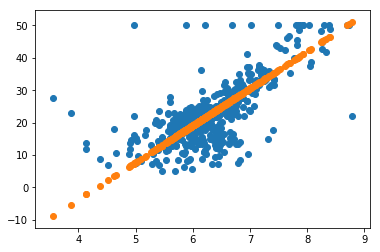

In [29]:
X_rm = X[:, 5]
k = 11.42075
b = -49.388600
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

####  Gradient Descent to get optimal *k* and *b*

#####  定义损失函数

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [15]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

##### 计算梯度

$$ loss = \frac{1}{n} \sum{{(y_i - (kx_i+b_i))^2}}$$

$$ \frac{\partial{loss}}{\partial{k}} = - \frac{2}{n} \sum{{(y_i - (kx_i+b_i))x_i}}$$

$$  \frac{\partial{loss}}{\partial{b}} = - \frac{2}{n} \sum{{(y_i - (kx_i+b_i))}}$$

In [16]:
def partial_k(x,y,y_hat):
    n = len(y)
    
    gradient = 0
    
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)*x_i
        
    return -2 / n * gradient

def partial_b(x,y,y_hat):
    n = len(y)
    
    gradient = 0
    
    for y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
        
    return -2 / n * gradient

In [17]:
from icecream import ic
from sklearn.datasets import load_boston

In [18]:
data = load_boston()

In [19]:
X, y = data['data'], data['target']

X_rm = X[:, 5]

In [24]:
trying_times = 10000

min_loss = float('inf')

# 初始化问题：对于复杂机器学习问题，如何初始化 k和 b
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04

update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r,current_k,current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        # 每隔五十步输出一次
        if i % 50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        
        k_gradient = partial_k(X_rm,y,price_by_k_and_b)
        
        b_gradient = partial_k(X_rm,y,price_by_k_and_b)
        
        current_k = current_k + (-1 * k_gradient) * learning_rate
        
        current_b = current_b + (-1 * b_gradient) * learning_rate
        

When time is : 0, get best_k: -8.501532498479563 best_b: -88.51775382692497, and the loss is: 27249.814415294564
When time is : 50, get best_k: -0.12640072387652757 best_b: -80.14262205232197, and the loss is: 10791.562861519895
When time is : 100, get best_k: 5.1348703098119755 best_b: -74.88135101863345, and the loss is: 4295.014356064996
When time is : 150, get best_k: 8.440009098657084 best_b: -71.57621222978837, and the loss is: 1730.2860452154366
When time is : 200, get best_k: 10.516302515890544 best_b: -69.49991881255487, and the loss is: 717.5529771461994
When time is : 250, get best_k: 11.820633326141742 best_b: -68.19558800230365, and the loss is: 317.5165259869049
When time is : 300, get best_k: 12.640016005126201 best_b: -67.37620532331918, and the loss is: 159.41212625064753
When time is : 350, get best_k: 13.15475350066266 best_b: -66.86146782778272, and the loss is: 96.8705392299702
When time is : 400, get best_k: 13.478112409883838 best_b: -66.53810891856149, and the l

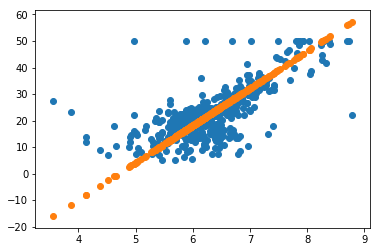

In [25]:
X_rm = X[:, 5]
k = 14.024469168933017
b = -65.99175215951209
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

####  Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [30]:
def loss1(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [31]:
loss1([1, 1, 1], [2, 2, 3])

1.3333333333333333

##### first method

In [32]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss1(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 6.200683844541487 best_b: 76.27391104856082, and the loss is: 92.71013563895215
When time is : 2, get best_k: 27.069446697680462 best_b: -55.6117609470316, and the loss is: 91.97700829168632
When time is : 11, get best_k: -7.668301053964527 best_b: 69.29030126188692, and the loss is: 9.689206348912736
When time is : 66, get best_k: -3.1145902497519558 best_b: 36.05719894636849, and the loss is: 8.63655414494344
When time is : 343, get best_k: 1.475501579673022 best_b: 14.509485194155204, and the loss is: 6.439265407747394
When time is : 677, get best_k: 17.507202333762024 best_b: -86.10475805297115, and the loss is: 6.1758198244102145
When time is : 881, get best_k: 10.671603096540721 best_b: -44.70329227023275, and the loss is: 4.4737405701452


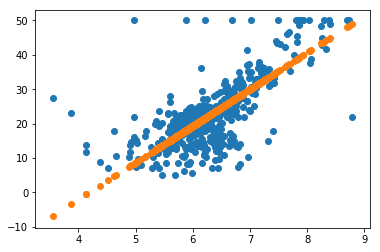

In [33]:
X_rm = X[:, 5]
k = 10.6716030
b =-44.7032922
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

##### 2nd method

In [40]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss1(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: 42.22909860445123 best_b: 87.58726727516526, and the loss is: 330.4489061874577
When time is : 2, get best_k: 42.12909860445123 best_b: 87.68726727516525, and the loss is: 329.92044274872245
When time is : 3, get best_k: 42.02909860445123 best_b: 87.78726727516525, and the loss is: 329.39197930998733
When time is : 4, get best_k: 41.92909860445123 best_b: 87.88726727516524, and the loss is: 328.8635158712527
When time is : 5, get best_k: 41.829098604451225 best_b: 87.98726727516524, and the loss is: 328.335052432517
When time is : 6, get best_k: 41.729098604451224 best_b: 88.08726727516523, and the loss is: 327.80658899378176
When time is : 7, get best_k: 41.62909860445122 best_b: 88.18726727516523, and the loss is: 327.2781255550465
When time is : 8, get best_k: 41.52909860445122 best_b: 88.28726727516522, and the loss is: 326.74966211631124
When time is : 9, get best_k: 41.42909860445122 best_b: 88.38726727516521, and the loss is: 326.221198677576
When t

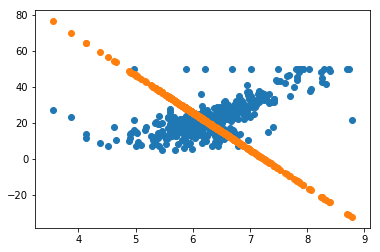

In [41]:
X_rm = X[:, 5]
k = -20.7709
b = 150.3872
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

##### Third method

In [45]:
trying_times = 10000

min_loss = float('inf')

# 初始化问题：对于复杂机器学习问题，如何初始化 k和 b
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04

update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r,current_k,current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        # 每隔五十步输出一次
        if i % 50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        
        k_gradient = partial_k(X_rm,y,price_by_k_and_b)
        
        b_gradient = partial_k(X_rm,y,price_by_k_and_b)
        
        current_k = current_k + (-1 * k_gradient) * learning_rate
        
        current_b = current_b + (-1 * b_gradient) * learning_rate
        

When time is : 0, get best_k: 14.33682791422764 best_b: -2.505871017185271, and the loss is: 4290.301268388967
When time is : 50, get best_k: 11.03072789952576 best_b: -5.8119710318871505, and the loss is: 1724.7373850130066
When time is : 100, get best_k: 8.953830638688022 best_b: -7.888868292724885, and the loss is: 711.8275415257135
When time is : 150, get best_k: 7.649120492929092 best_b: -9.193578438483812, and the loss is: 311.81742583963546
When time is : 200, get best_k: 6.829499514778414 best_b: -10.013199416634496, and the loss is: 153.7837877474013
When time is : 250, get best_k: 6.3146123193286465 best_b: -10.528086612084266, and the loss is: 91.30804960977237
When time is : 300, get best_k: 5.991159368385035 best_b: -10.851539563027885, and the loss is: 66.58383273144422
When time is : 350, get best_k: 5.787965712767436 best_b: -11.054733218645483, and the loss is: 56.78341254726261
When time is : 400, get best_k: 5.660319136773011 best_b: -11.182379794639902, and the loss

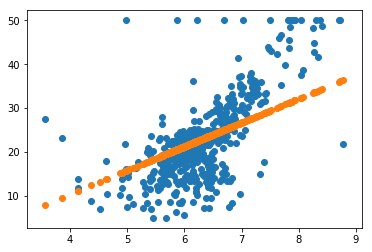

In [46]:
X_rm = X[:, 5]
k = 5.44464
b =-11.3980
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?




Ans: 

*    因为现实世界中的数据量越来越多，很难写出一个能囊括所有情况的公式。

*  机器学习可以用来处理大数据量的问题 



###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:


1.  损失下降的速度慢
2.  耗费的时间长



###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:



1.   是的，监督方法比随机方法好
2.   

      *  搜索空间大
      *   不能确保每次都朝着正确的方向前进，具有随机性





###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

导数代表了函数的变化趋势，导数大于0，函数随着自变量的增加而增加；反之则减小。
我们的目标是优化目标函数，需要根据导数的值做出优化的选择。



###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:



*  函数的梯度代表了函数值增长速度最快的方向
*  与梯度相反的方向就是函数减小速度最快的方向，这就是下降的意思。



###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:


1.   能保证每次都朝着正确的方向前进，最后收敛于极值点





###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

机器学习式一种能够从数据中学习的方法

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)